In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# DataViz
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

#path = r"P:\DATA 5000\aging.csv"
path = r"C:\Users\enmao\OneDrive - Carleton University\DATA 5000\aging.csv"
df = pd.read_csv(path)
df = pd.DataFrame(df)
df.head(5)

,Unnamed: 0,country_text,start_procedures,start_cost,year,start_cost_1,start_procedure_1,cpi,cpi_5geo,cpi_7geo,...,cost_cost_dd25_1,pro_cost_dd25_1,cost_50_1,cost_cost_50_1,pro_cost_50_1,inf7_50_1,nascent,rinterest,deposit,spread
0,0,Ukraine,15.0,25.6,2004,NaN,NaN,9.048068,13.289716,13.271830,...,NaN,NaN,0.0,NaN,NaN,13.271830,NaN,1.950031,7.795909,9.605317
1,1,Mali,12.0,204.3,2004,NaN,NaN,-3.099781,1.353519,1.484597,...,NaN,NaN,0.0,NaN,NaN,1.484597,NaN,NaN,3.500000,NaN
2,2,Cameroon,11.0,193.0,2004,NaN,NaN,0.233647,2.186619,2.694524,...,NaN,NaN,0.0,NaN,NaN,2.694524,NaN,16.246422,5.000000,13.000000
3,3,Lebanon,7.0,129.7,2004,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,14.137871,7.373334,3.435000
4,4,Slovenia,9.0,14.8,2004,NaN,NaN,3.589027,7.292399,7.533131,...,NaN,NaN,0.0,NaN,NaN,0.000000,1.901597,5.162681,3.816667,4.833334


In [3]:

df = df[['unemp', 'pop_retire', "cpi", "deflator",'ln_prgdp', 'growth_prgdp', 'labor', 'labor_1', 'cpi_5geo', 'deflator_5geo',
              'ln_prgdp_1', 'growth_prgdp_1', 'pop_retire_1', 'unemp_1']]
#df = df[['unemp', 'pop_retire', "cpi", "deflator",'ln_prgdp', 'growth_prgdp', 'labor']]

#target = df['unemp']

# fill the missing values with the mean of the column
df.fillna(df.mean(), inplace=True)

# our target variable is 'unemp'
y = df['unemp']
X = df.drop('unemp', axis=1)
df.head(5)

,unemp,pop_retire,cpi,deflator,ln_prgdp,growth_prgdp,labor,labor_1,cpi_5geo,deflator_5geo,ln_prgdp_1,growth_prgdp_1,pop_retire_1,unemp_1
0,8.6,0.157353,9.048068,15.155654,7.477395,12.180710,66.6,66.5,13.289716,14.428472,7.355588,0.097955,0.153210,9.1
1,8.8,0.029753,-3.099781,-0.614074,5.993728,-0.981045,53.2,53.0,1.353519,3.674483,6.003539,0.041044,0.030504,8.6
2,5.1,0.033359,0.233647,1.508500,6.821986,1.060820,69.9,69.8,2.186619,2.179810,6.811378,0.013683,0.033561,6.0
3,7.9,0.073249,5.709205,-2.917119,8.587699,2.933693,49.3,49.0,6.424401,0.679993,8.558362,-0.017599,0.072188,8.5
4,6.3,0.152512,3.589027,3.316218,9.769965,4.195595,70.0,67.4,7.292399,6.781683,9.728009,0.027425,0.149885,6.7


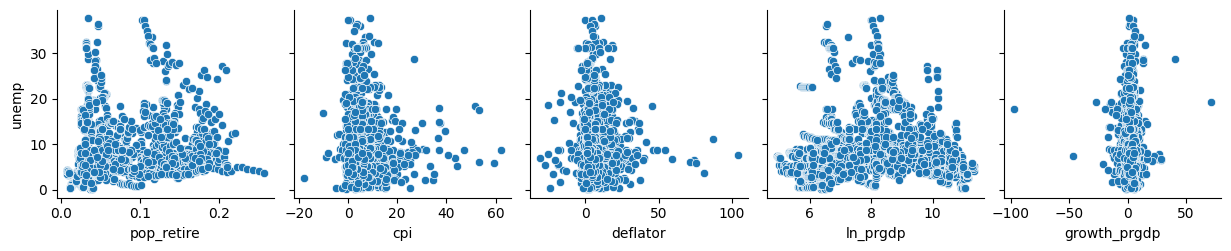

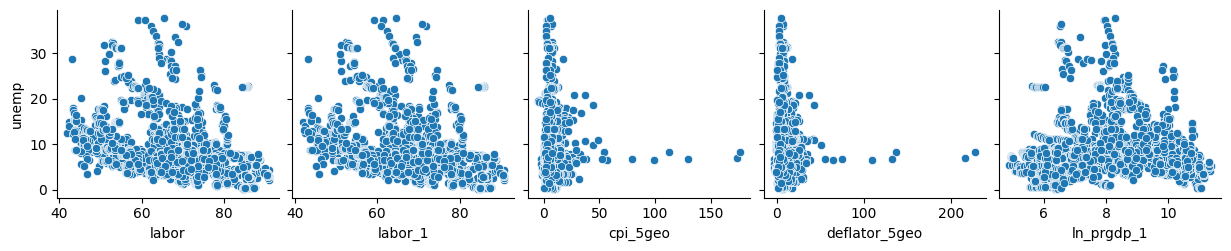

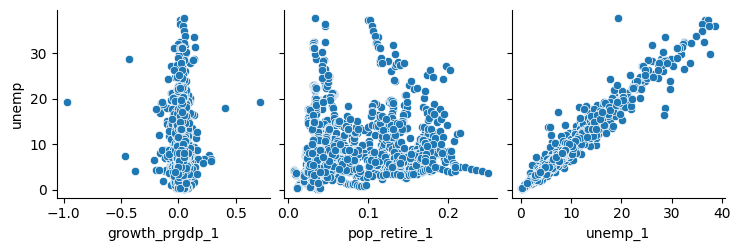

In [4]:

# one way to split the data into train and test 
'''
df['split'] = np.random.randn(df.shape[0], 1)

msk = np.random.rand(len(df)) <= 0.7

train = df[msk]
test = df[~msk]
'''
# an alternative way
from sklearn.model_selection import train_test_split
# split into X_train and X_test
# random_state simply sets a seed to the random generator, so that your train-test splits are always deterministic. 
# If you don't set a seed, it is different each time.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# Let's see the possible best variables for modeling the unemp
pp1 = sns.pairplot(data=df,
                  x_vars=['pop_retire', "cpi", "deflator",'ln_prgdp', 'growth_prgdp'],
                  y_vars=['unemp'])
pp2 = sns.pairplot(data=df,
                  x_vars=['labor', 'labor_1', 'cpi_5geo', 'deflator_5geo', 'ln_prgdp_1'], y_vars=['unemp'])
pp3 = sns.pairplot(data=df,
                  x_vars=['growth_prgdp_1', 'pop_retire_1', 'unemp_1'],
                  y_vars=['unemp'])
#pp = sns.pairplot(data=df)
#sns.lmplot(x='pop_retire', y='unemp', data=df)
#plt.title("Scatter Plot with Linear fit");

In [8]:
cor = df.corr().style.background_gradient(cmap='coolwarm')
cor

,unemp,pop_retire,cpi,deflator,ln_prgdp,growth_prgdp,labor,labor_1,cpi_5geo,deflator_5geo,ln_prgdp_1,growth_prgdp_1,pop_retire_1,unemp_1
unemp,1.000000,0.083587,-0.000520,-0.012394,-0.002899,-0.010919,-0.375394,-0.372613,0.020454,0.006256,-0.005180,-0.038675,0.084852,0.978041
pop_retire,0.083587,1.000000,-0.245931,-0.222759,0.668507,-0.053175,0.052061,0.048807,-0.166214,-0.197047,0.669184,-0.036488,0.999756,0.069918
cpi,-0.000520,-0.245931,1.000000,0.597847,-0.314687,0.086778,-0.077167,-0.074086,0.395324,0.375217,-0.318538,0.127516,-0.243732,0.008423
deflator,-0.012394,-0.222759,0.597847,1.000000,-0.254048,0.143862,-0.048977,-0.047061,0.288265,0.330772,-0.256343,0.093503,-0.220116,0.004186
ln_prgdp,-0.002899,0.668507,-0.314687,-0.254048,1.000000,-0.126780,0.000783,-0.005424,-0.244771,-0.248858,0.994601,-0.102919,0.666558,-0.012313
growth_prgdp,-0.010919,-0.053175,0.086778,0.143862,-0.126780,1.000000,-0.031046,-0.030192,0.114454,0.127643,-0.158176,0.093010,-0.052991,0.035875
labor,-0.375394,0.052061,-0.077167,-0.048977,0.000783,-0.031046,1.000000,0.998139,-0.040899,-0.034629,0.003725,-0.030137,0.051884,-0.381903
labor_1,-0.372613,0.048807,-0.074086,-0.047061,-0.005424,-0.030192,0.998139,1.000000,-0.037277,-0.030795,-0.002553,-0.029373,0.048626,-0.379076
cpi_5geo,0.020454,-0.166214,0.395324,0.288265,-0.244771,0.114454,-0.040899,-0.037277,1.000000,0.911181,-0.248578,0.085858,-0.164409,0.022854
deflator_5geo,0.006256,-0.197047,0.375217,0.330772,-0.248858,0.127643,-0.034629,-0.030795,0.911181,1.000000,-0.253369,0.105116,-0.194584,0.009900


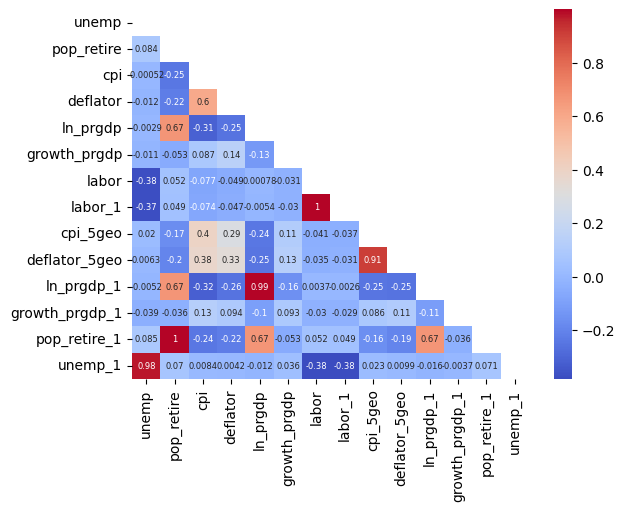

In [15]:
# creating mask
mask = np.triu(np.ones_like(df.corr()))
 
# plotting a triangle correlation heatmap
#dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=mask)
dataplot = sns.heatmap(df.corr(), cmap="coolwarm", annot=True, mask=mask, annot_kws={'fontsize': 6})
dataplot.figure.savefig("correlation.png")

In [8]:
# our target variable is 'unemp'
y = df['unemp']
X = df[['pop_retire', 'ln_prgdp', 'labor', 'pop_retire_1',\
            'ln_prgdp_1', 'labor_1', 'unemp_1']]


from sklearn.model_selection import train_test_split
# split into X_train and X_test
# random_state simply sets a seed to the random generator, so that your train-test splits are always deterministic. 
# If you don't set a seed, it is different each time.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# remove outliers
# Extract the descriptive statistics for the explanatory variables for IQR calculation
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
pop_retire,1619.0,0.076738,0.052444,0.006969,0.033793,0.056546,0.114636,0.257054
ln_prgdp,1619.0,8.171669,1.563787,4.973450,6.855996,8.167719,9.356693,11.350593
labor,1619.0,68.930086,9.819783,41.900000,63.850000,68.900000,74.800000,90.800000
pop_retire_1,1619.0,0.075811,0.051559,0.006969,0.033515,0.056381,0.112699,0.250093
ln_prgdp_1,1619.0,8.156592,1.579879,4.960824,6.825221,8.151108,9.362589,11.363606
labor_1,1619.0,68.799768,9.808143,41.900000,63.650000,68.800000,74.600000,90.800000
unemp_1,1619.0,8.650644,5.849996,0.100000,4.900000,7.600000,9.600000,38.600000


In [41]:
# linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# prediction
preds_lr = lr.predict(X_test)

C:\Users\enmao\AppData\Local\Temp\ipykernel_13300\817422902.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\enmao\AppData\Local\Temp\ipykernel_13300\817422902.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.

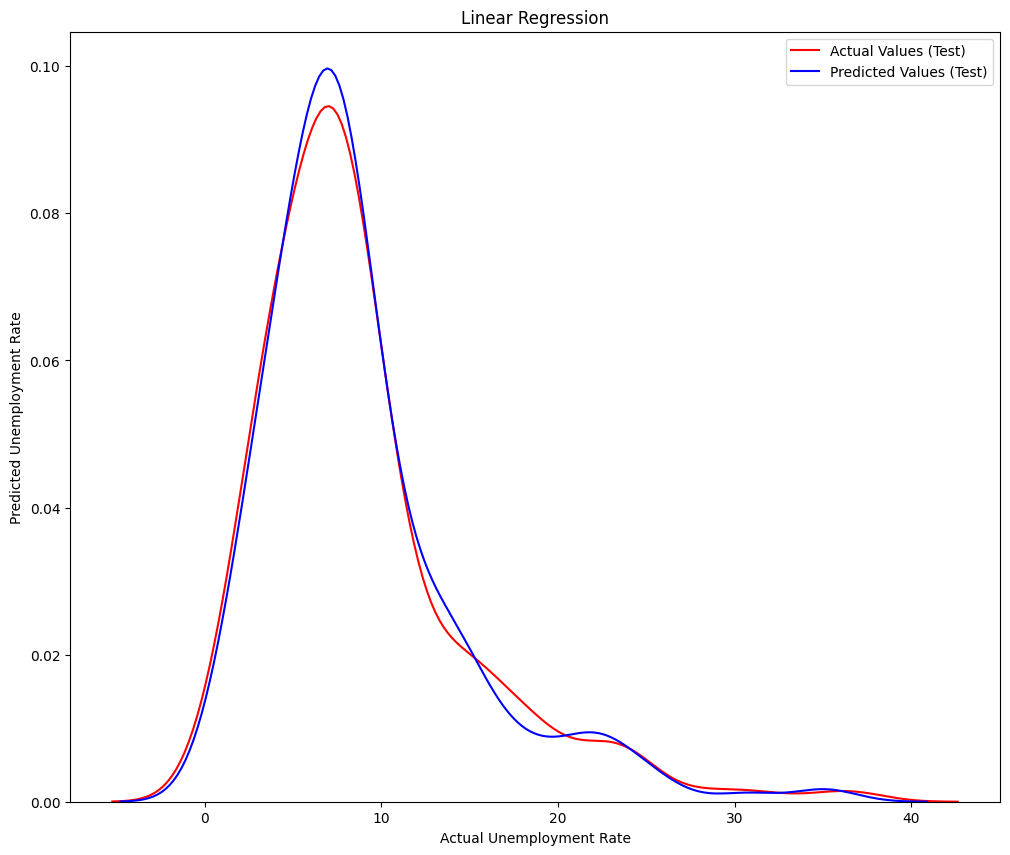

In [42]:
# predicted vs actual
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Actual Unemployment Rate')
    plt.ylabel('Predicted Unemployment Rate')
    
    plt.legend() 
    plt.show()
    plt.close()
    
Title = 'Linear Regression'
DistributionPlot(y_test, preds_lr, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [38]:
# Log transformation
X_log = np.log(X_train)
y_log = np.log(y_train)

# modeling
# linear regression
# Instance and fit
lr_model = LinearRegression().fit(X_train, y_train)

# linear regression with log transformation
# Instance and fit
lrLog_model = LinearRegression().fit(X_log, y_log)

# Remove zeroes
X_test_log = X_test[(X_test.pop_retire > 0) & (X_test.ln_prgdp > 0)\
                    & (X_test.labor > 0) & (X_test.pop_retire_1 > 0)\
                   & (X_test.ln_prgdp_1 > 0) & (X_test.labor_1 > 0)\
                   & (X_test.unemp_1 > 0)]
y_test_log = y_test[X_test_log.index]

# Log Transform X_test and y test
X_test_log = np.log(X_test_log)
y_test_log = np.log(y_test_log)

# Predictions
preds_lrlog = lrLog_model.predict(X_test_log)

# Performance
performance_lrlog = pd.DataFrame({'Error': y_test - preds_lrlog})


,Error
565,5.379452
902,4.070049
724,2.874963
1020,25.309734
1454,3.708217
...,...
1284,6.486817
156,4.863312
1414,6.368423
1632,3.514212


C:\Users\enmao\AppData\Local\Temp\ipykernel_13300\2168323922.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\enmao\AppData\Local\Temp\ipykernel_13300\2168323922.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sn

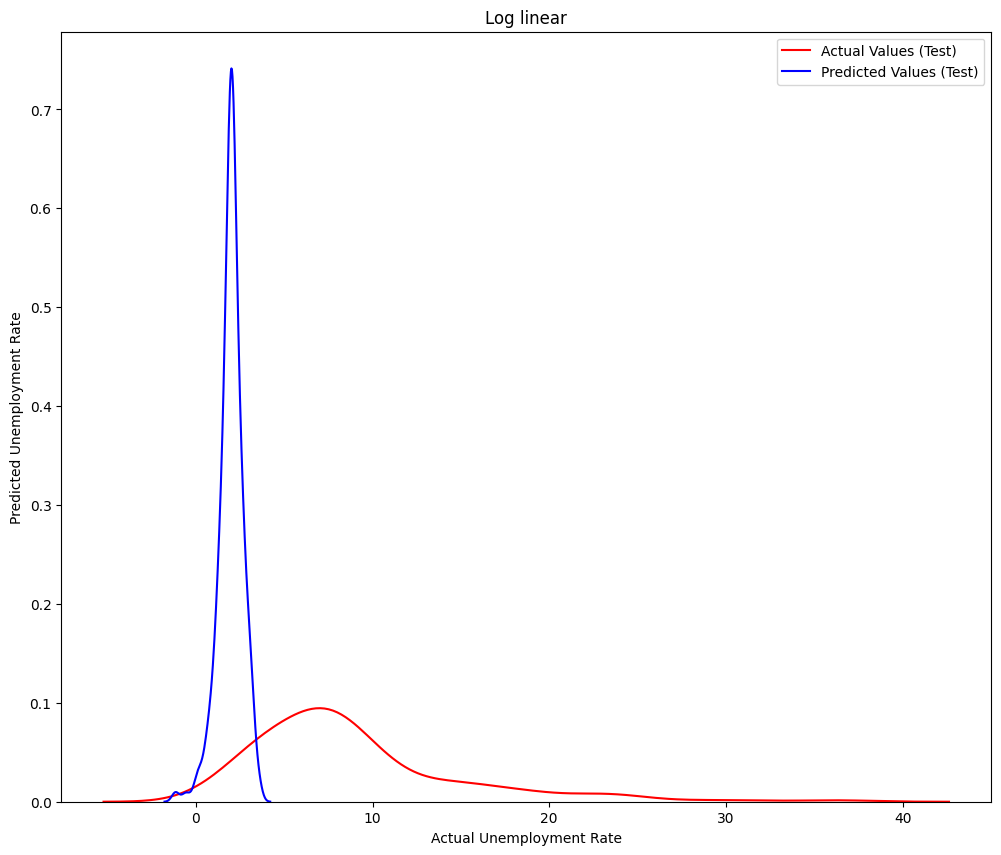

In [39]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Actual Unemployment Rate')
    plt.ylabel('Predicted Unemployment Rate')
    
    plt.legend() 
    plt.show()
    plt.close()
    
Title = 'Log linear'
DistributionPlot(y_test, preds_lrlog, "Actual Values (Test)", "Predicted Values (Test)", Title)

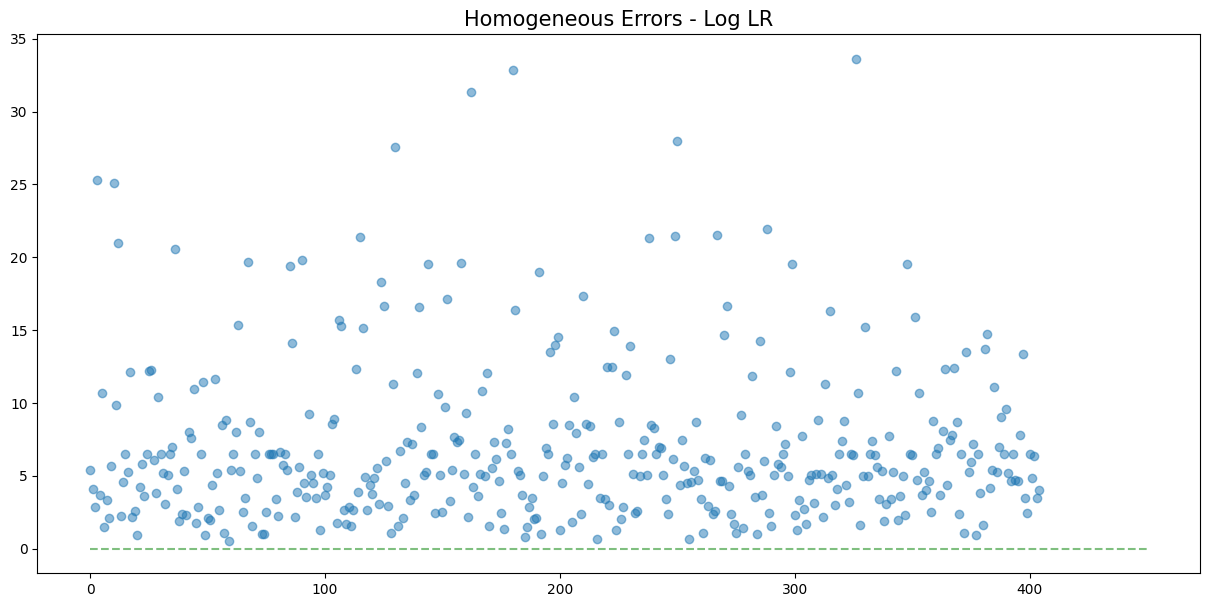

In [52]:
# model evalution
plt.figure(figsize=(15,7))
yerr_lrlog = performance_lrlog['Error']

plt.scatter(range(len(yerr_lrlog)), yerr_lrlog, alpha=.5)
plt.title('Homogeneous Errors - Log LR', size=15);
plt.hlines(y=0, xmin=0, xmax=450, linestyle='--', color='green', alpha=.5);


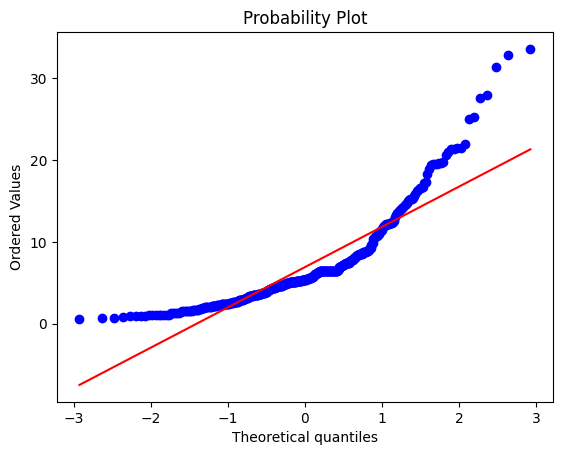

In [53]:
# QQ Plot
probplot(yerr_lrlog, dist='norm', plot=plt);

In [9]:
# KNN regression
# Instance and fit
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

# Predictions
preds_knn = knn_model.predict(X_test)

# Performance
performance_knn = pd.DataFrame({'Error': y_test - preds_knn})



C:\Users\enmao\AppData\Local\Temp\ipykernel_13300\601190814.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\enmao\AppData\Local\Temp\ipykernel_13300\601190814.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.

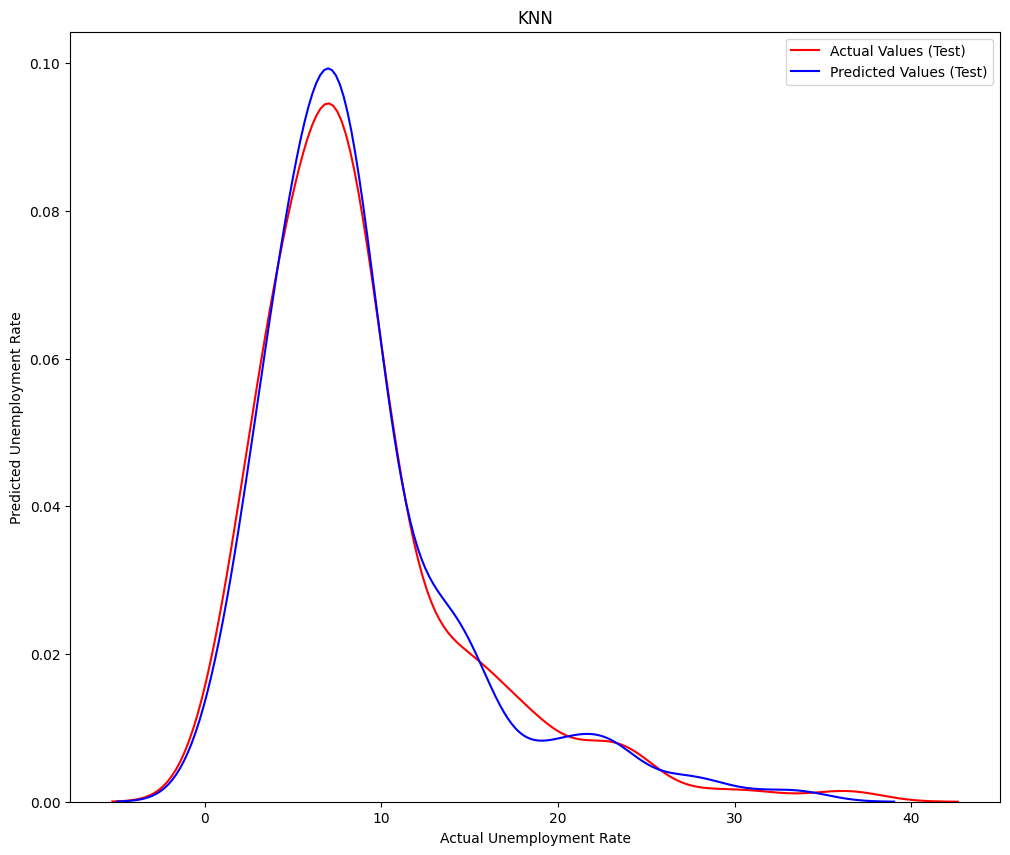

In [35]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Actual Unemployment Rate')
    plt.ylabel('Predicted Unemployment Rate')
    
    plt.legend() 
    plt.show()
    plt.close()
    
Title = 'KNN'
DistributionPlot(y_test, preds_knn, "Actual Values (Test)", "Predicted Values (Test)", Title)

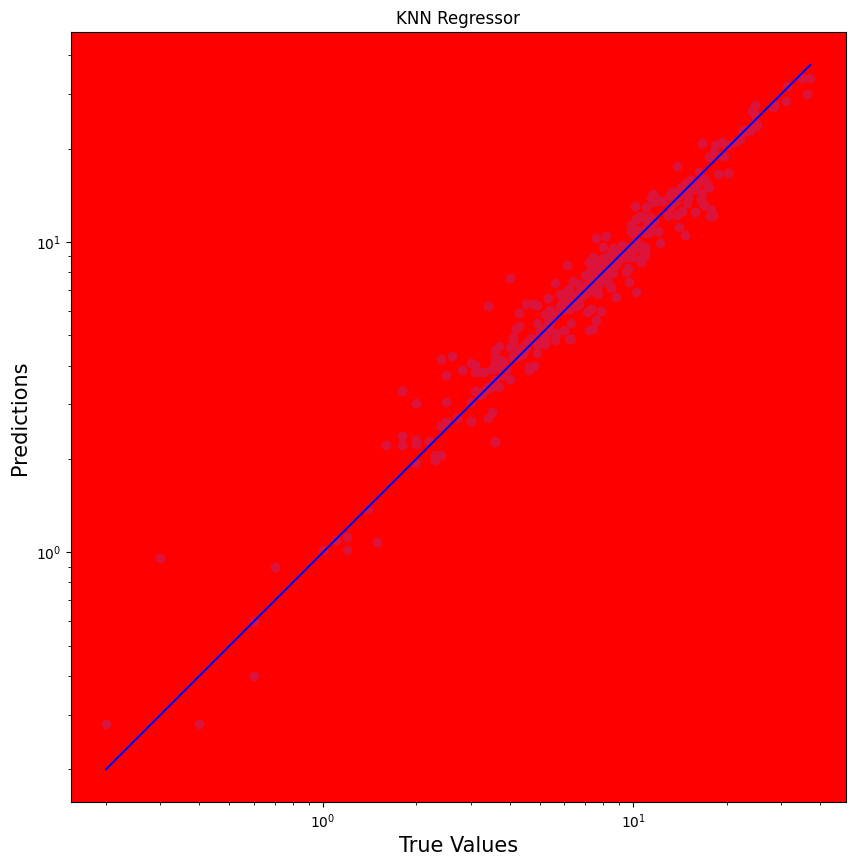

In [137]:
# Plot the predicted and real y
plt.figure(figsize=(10,10))
plt.scatter(y_test, preds_knn, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test), max(preds_knn))
p2 = min(min(preds_knn), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('KNN Regressor')
plt.axis('equal')
plt.show()

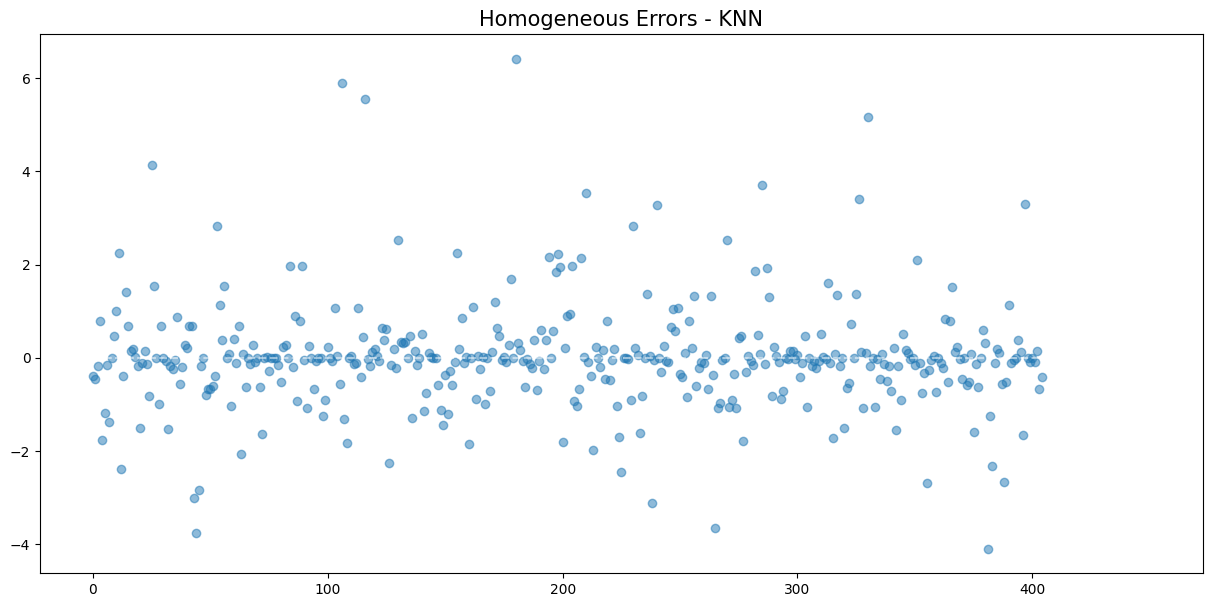

In [43]:
# model evalution
plt.figure(figsize=(15,7))
yerr_knn = performance_knn['Error']

plt.scatter(range(len(yerr_knn)), yerr_knn, alpha=.5)
plt.title('Homogeneous Errors - KNN', size=15);
plt.hlines(y=0, xmin=0, xmax=450, linestyle='--', color='white', alpha=.5);


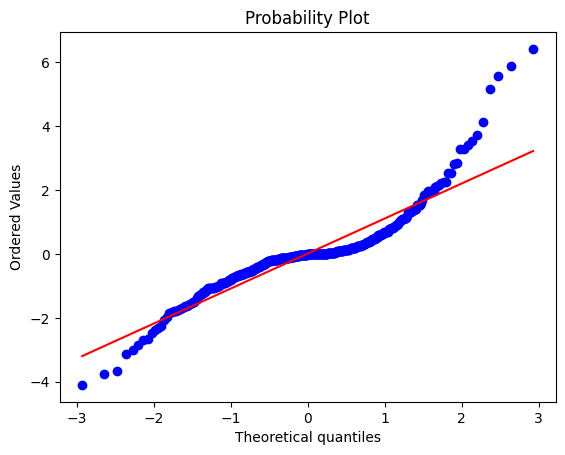

In [44]:
from scipy.stats import probplot
#QQ Plot
probplot(yerr_knn, dist='norm', plot=plt);

In [54]:
# model comparison
# Score
score_lr = lr_model.score(X_test, y_test)
score_log = lrLog_model.score(X_test_log, y_test_log)
score_knn = knn_model.score(X_test, y_test)
pd.DataFrame({'Linear Regression':[score_lr],
              'Log_Linear Regression': [score_log],
              'KNN Regression': [score_knn]})

,Linear Regression,Log_Linear Regression,KNN Regression
0,0.970196,0.965731,0.961336


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [17]:
# Building the regression model
reg = LinearRegression()
reg.fit(X_train,y_train)

# Predictions on the basis of the model
y_pred_lr = reg.predict(X_test)


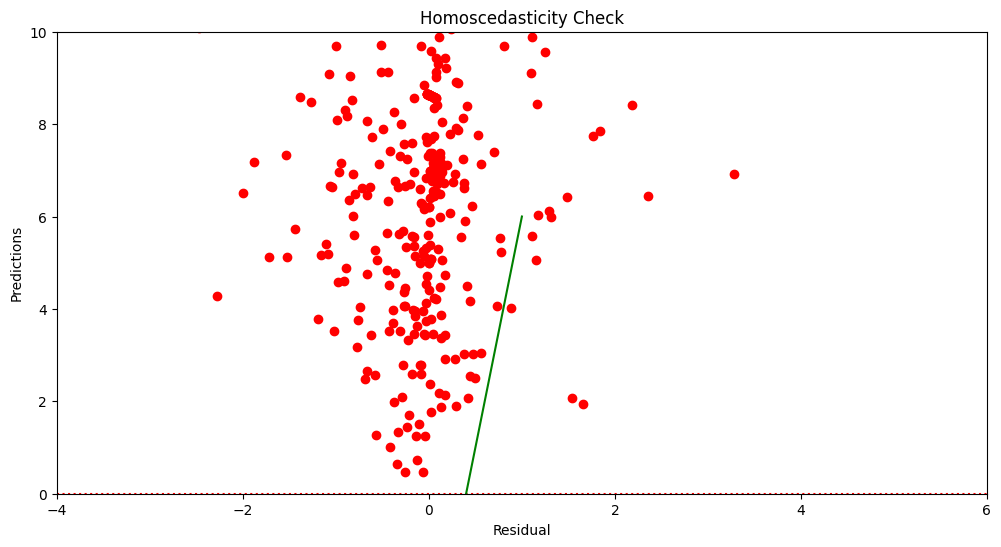

In [19]:
#residual analysis 
# check 1: Homoscedasticity
fig = plt.figure(figsize = (12,6))
plt.scatter((y_test - y_pred_lr), y_pred_lr, color = 'red')
plt.axhline(y=0, color='r', linestyle=':')
plt.ylim(0,10)
plt.xlim(-4,6)
p = sns.lineplot([-4,6], color='g')
plt.ylabel("Predictions")
plt.xlabel("Residual")
p = plt.title('Homoscedasticity Check')
plt.show()

C:\Users\enmao\AppData\Local\Temp\ipykernel_13300\835041168.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred_lr), bins = 10, color = 'b')


Text(0.5, 0, 'Errors')

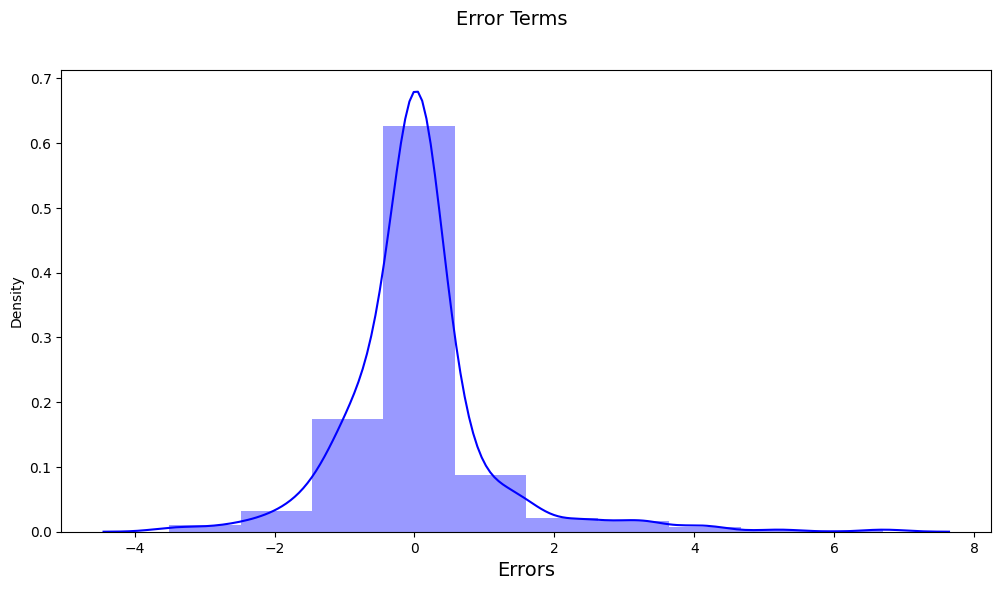

In [20]:
# Plot the histogram of the error or residuals terms terms
fig = plt.figure(figsize = (12,6))
sns.distplot((y_test - y_pred_lr), bins = 10, color = 'b')
# Plot heading
fig.suptitle('Error Terms', fontsize = 14)    
# Give the X-label
plt.xlabel('Errors', fontsize = 14) 

In [21]:
from sklearn.metrics import r2_score
def mse(y, y_pred):
   # Find the value of r squared
    print("R2-Square Value:", round(r2_score(y , y_pred),6))

    # Metrics to give an overall sense of error in the model
    #rss = np.sum(np.square(y - y_pred))
    #print("RSS:", round(rss,3))
    mse = mean_squared_error(y, y_pred)
    print("MSE:", round(mse,6))
    #rmse = mse**0.5
    #print("EMSE:", round(rmse,3))
    
mse(y_test, y_pred_lr)

R2-Square Value: 0.970196
MSE: 1.073784


In [24]:
# Fit a non-liner model using SVR()
from sklearn.svm import SVR

# I. SVR() using rbf kernal
# Build the model
model = SVR(kernel = 'rbf', C=100, epsilon=0.0001)
svr_model_rbf = model.fit(X_train, y_train)

# Predictions
preds_svr_rbf = svr_model_rbf.predict(X_test)

# Find the value of r squared
r2_score(y_test , preds_svr_rbf)

mse(y_test, preds_svr_rbf)

R2-Square Value: 0.969987
MSE: 1.081324


In [27]:
# II. SVR() using linear kernal
# Build the model
svr = SVR(kernel = 'linear', C=100, epsilon=0.0001)
svr_model_linear = model.fit(X_train, y_train)

# Predictions
preds_svr_lin = svr_model_linear.predict(X_test)

# Find the value of r squared
r2_score(y_test , preds_svr_lin)

mse(y_test, preds_svr_lin)

R2-Square Value: 0.969987
MSE: 1.081324


In [43]:
# III. SVR() using poly kernal
# Build the model
svr = SVR(kernel = 'poly', C=100, epsilon=0.0001)
svr_model_poly = model.fit(X_train, y_train)

# Predictions
preds_svr = svr_model_poly.predict(X_test)

# Find the value of r squared
r2_score(y_test , preds_svr)

mse(y_test, preds_svr)

R2-Square Value: 0.969987
MSE: 1.081324


In [29]:
# KNN
# Find the value of r squared
r2_score(y_test , preds_svr)

mse(y_test, preds_knn)

R2-Square Value: 0.961336
MSE: 1.393013


C:\Users\enmao\AppData\Local\Temp\ipykernel_13300\601190814.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\enmao\AppData\Local\Temp\ipykernel_13300\601190814.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.

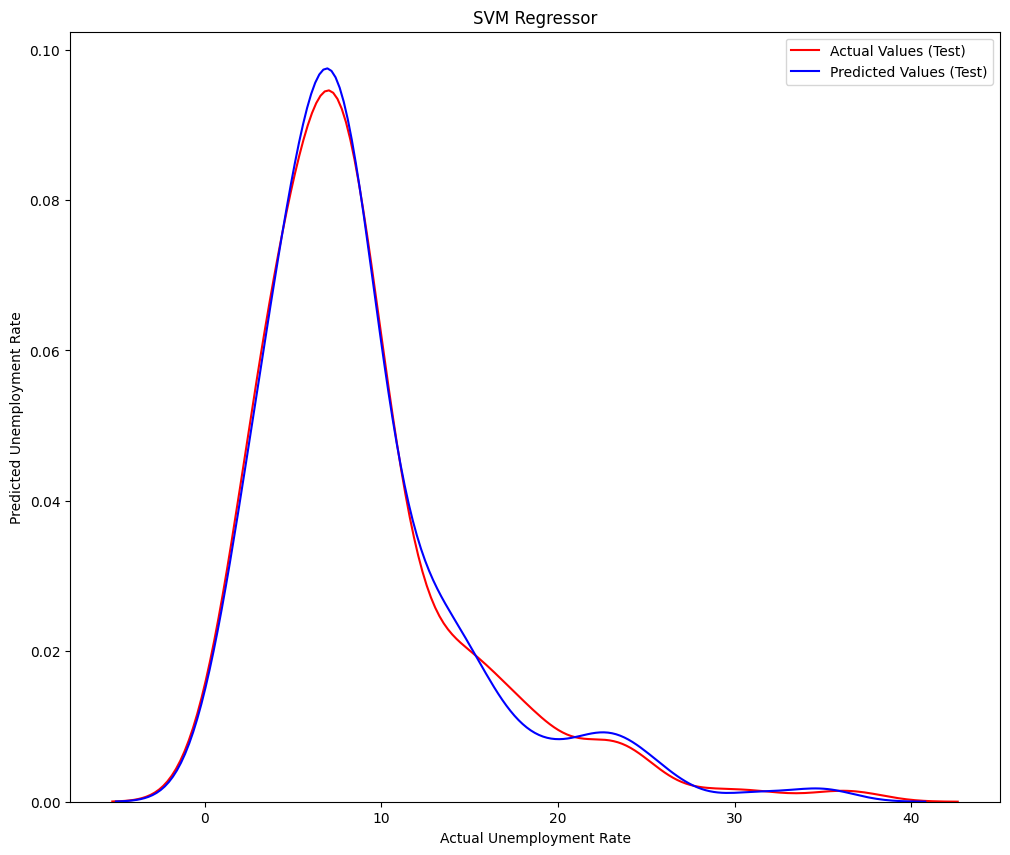

In [36]:
Title = 'SVM Regressor'
DistributionPlot(y_test, preds_svr, "Actual Values (Test)", "Predicted Values (Test)", Title)

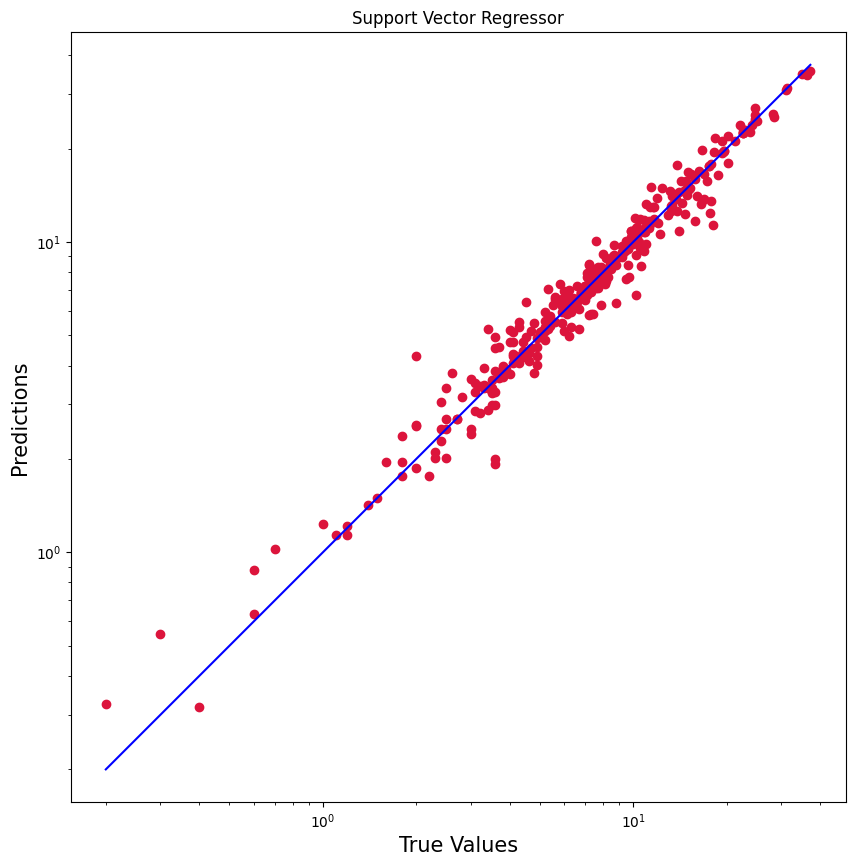

In [121]:
# Plot the predicted and real y
plt.figure(figsize=(10,10))
plt.scatter(y_test, preds_svr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test), max(preds_svr))
p2 = min(min(preds_svr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Support Vector Regressor')
plt.axis('equal')

plt.show()

In [31]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# prediction
preds_decision_tree = regressor.predict(X_test)

# mse
mse(y_test, preds_decision_tree)

R2-Square Value: 0.937864
MSE: 2.238691


C:\Users\enmao\AppData\Local\Temp\ipykernel_13300\601190814.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\enmao\AppData\Local\Temp\ipykernel_13300\601190814.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.

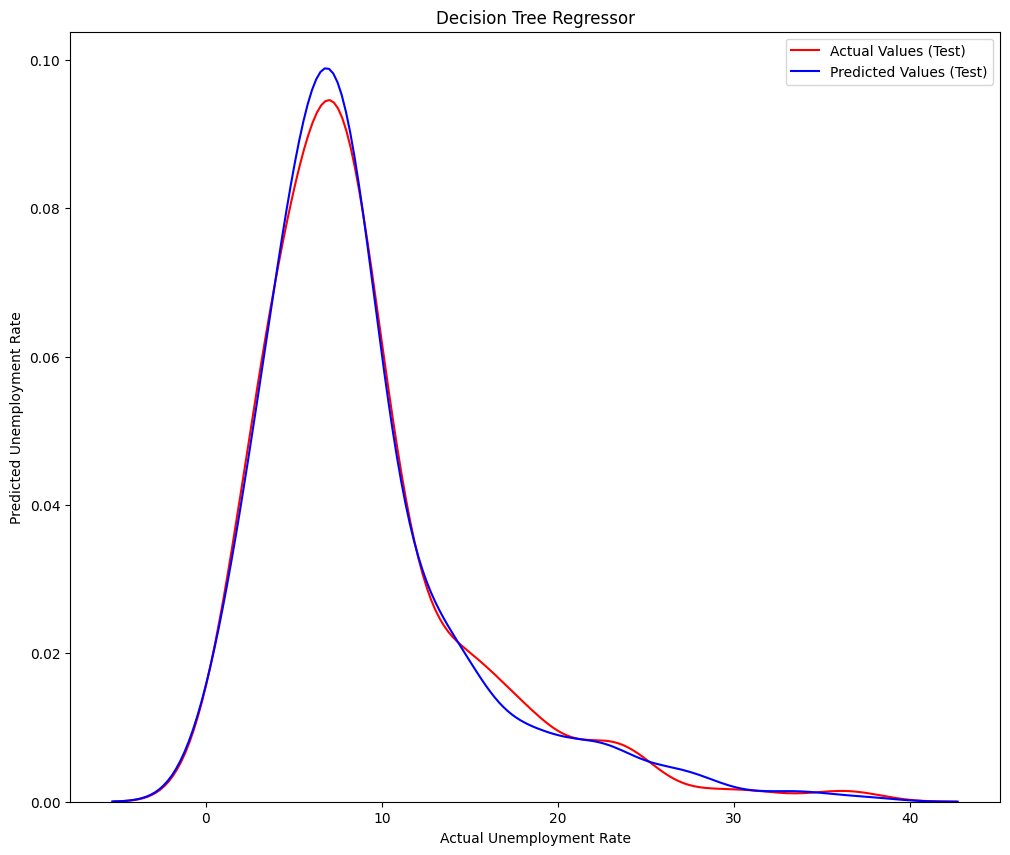

In [37]:
Title = 'Decision Tree Regressor'
DistributionPlot(y_test, preds_decision_tree, "Actual Values (Test)", "Predicted Values (Test)", Title)

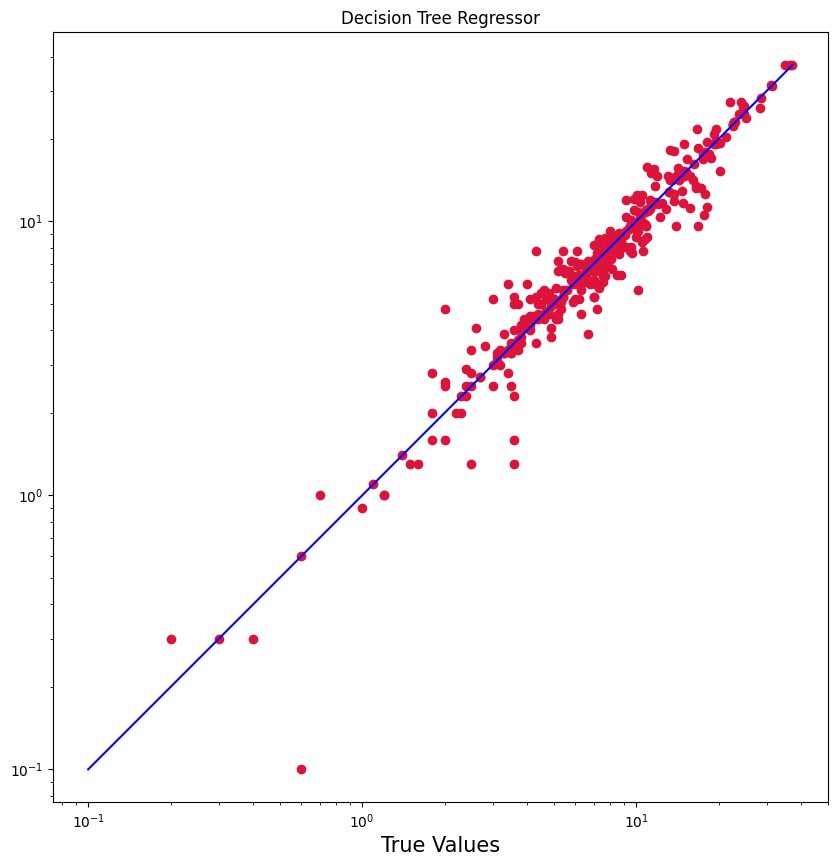

In [112]:
# Plot the predicted and real y
plt.figure(figsize=(10,10))
plt.scatter(y_test, preds_decision_tree, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test), max(preds_decision_tree))
p2 = min(min(preds_decision_tree), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
#plt.ylabel('Predictions', fontsize=15)
plt.title('Decision Tree Regressor')
plt.axis('equal')
plt.show()

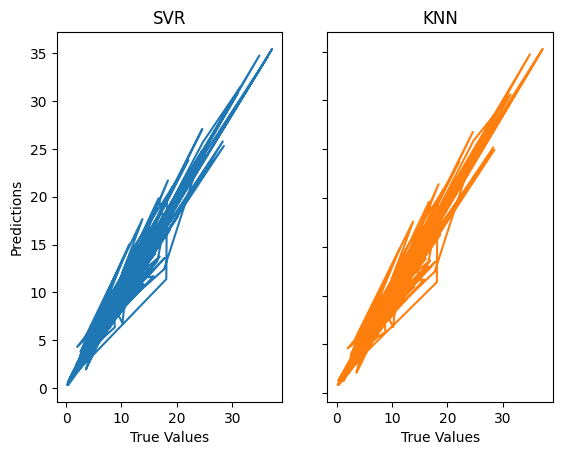

In [111]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(y_test, preds_svr)
axs[0].set_title('SVR')
axs[1].plot(y_test, preds_knn, 'tab:orange')
axs[1].set_title('KNN')


for ax in axs.flat:
    ax.set(xlabel='True Values', ylabel='Predictions')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
axs[1, 0].plot(y_test, preds_decision_tree, 'tab:green')
axs[1, 0].set_title('Decision Tree')
#axs[1, 1].plot(y_test, preds_knn, 'tab:red')
#axs[1, 1].set_title('Neural Network')

In [48]:
175.5*0.2048/(1-0.2048)

45.199195171026155

In [46]:
92/(175+92)

0.3445692883895131